In [122]:
%load_ext autoreload
%autoreload 2
from JW import *
import torch.optim as optim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# human mouse gene map
human2mouse = pickle.load(open("data/human2mouse.map", 'rb'))
mouse2human = pickle.load(open("data/mouse2human.map", 'rb'))

In [4]:
spatial_data = pd.read_csv("../dat/Reformat_GSE137986/GSM4189614_0713cL.tsv", delimiter="\t", index_col=0)
spatial_data.fillna(0)

,41x14,41x15,41x16,41x17,41x18,41x19,41x20,41x21,41x22,41x23,...,42x35,42x36,42x37,42x38,42x39,42x40,42x41,42x42,42x43,42x44
Gm37363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm38148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
mt-Nd6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mt-Cytb,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,5.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
mt-Tt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
autism_gene = pd.read_csv("../dat/sfari_high_confidence_genes_08292019.csv", index_col=0)
control_gene = pd.read_csv("../dat/control_genes_1911_iossifov.csv", index_col=0)

In [6]:
ssc = pd.read_excel("../dat/Supplementary_Table_7.xlsx")

In [7]:
sib = ssc[((ssc["dnv_LGDs_prb"]==0) & (ssc["dnv_missense_prb"]==0) ) & ((ssc["dnv_LGDs_sib"]!=0) | (ssc["dnv_missense_sib"]!=0))]

In [8]:
sib.head(2)

,gene,codingLen,codingLenInTarget,set_FMRPTargets,set_PSD,set_Embryonic,set_ChromatinModifiers,set_EssentialGenes,set_MendelianDiseaseGenes,set_DeNovoLGDsInSchizoprenia,...,dnv_missense_prbML,dnv_missense_prbMH,dnv_missense_prbF,dnv_missense_sib,dnv_synonymous_prb,dnv_synonymous_prbM,dnv_synonymous_prbML,dnv_synonymous_prbMH,dnv_synonymous_prbF,dnv_synonymous_sib
366,NSD1,8091,8091,1,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
379,CHD6,8148,8148,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [224]:
sib.shape

(977, 29)

In [9]:
autism_mouse_gene = [human2mouse[g] for g in autism_gene["gene.symbol"].values if g in human2mouse]
#cont_mouse_gene = [human2mouse[g] for g in control_gene["GeneName"].values if g in human2mouse]
cont_mouse_gene = [human2mouse[g] for g in sib["gene"].values if g in human2mouse]

In [10]:
print(len(autism_mouse_gene), len(cont_mouse_gene))

85 853


In [11]:
spatial_data.head(2)


,41x14,41x15,41x16,41x17,41x18,41x19,41x20,41x21,41x22,41x23,...,42x35,42x36,42x37,42x38,42x39,42x40,42x41,42x42,42x43,42x44
Gm37363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
autism_spatial = spatial_data.loc[spatial_data.index.intersection(autism_mouse_gene),:]  
cont_spatial = spatial_data.loc[spatial_data.index.intersection(cont_mouse_gene),:]  

In [45]:
training_dat_pos = []
for i, row in autism_spatial.iterrows():
    dat = spatial_transform(autism_spatial.columns.values, row.values)
    #print(torch.sum(dat[0][0]))
    training_dat_pos.append((dat, np.float32(1)))

training_dat_neg = []
for i, row in cont_spatial.iterrows():
    dat = spatial_transform(cont_spatial.columns.values, row.values)
    #print(torch.sum(dat[0][0]))
    training_dat_neg.append((dat, np.float32(0)))

training_dat = training_dat_pos + training_dat_neg

In [46]:
# Generate Fake Data
"""
Fake_training_dat_pos = []
N_fake = 1000
for dat in training_dat_pos:
    fake_dat = generateFakeDat(dat, N_fake, autism_spatial.columns.values, 1)
    Fake_training_dat_pos.extend(fake_dat)

Fake_training_dat_neg = []
N_fake = 1000
for dat in training_dat_neg:
    fake_dat = generateFakeDat(dat, N_fake, cont_spatial.columns.values, 0)
    Fake_training_dat_neg.extend(fake_dat)
"""

'\nFake_training_dat_pos = []\nN_fake = 1000\nfor dat in training_dat_pos:\n    fake_dat = generateFakeDat(dat, N_fake, autism_spatial.columns.values, 1)\n    Fake_training_dat_pos.extend(fake_dat)\n\nFake_training_dat_neg = []\nN_fake = 1000\nfor dat in training_dat_neg:\n    fake_dat = generateFakeDat(dat, N_fake, cont_spatial.columns.values, 0)\n    Fake_training_dat_neg.extend(fake_dat)\n'

In [47]:
train, test = sklearn.model_selection.train_test_split(training_dat, test_size=0.3)
print(len(train), len(test))

561 241


In [48]:
# Generate Fake Training Data
Fake_training_dat = []
N_fake = 20
for dat in train:
    fake_dat = generateFakeDat(dat, N_fake, autism_spatial.columns.values)
    Fake_training_dat.extend(fake_dat)
train_w_fake = train + Fake_training_dat

In [50]:
# Normlize data to [0, 1] scale
for dat in train:
    #print(torch.max(dat[0][0]))
    if torch.max(dat[0][0]) == 0:
        continue
    else:
        dat[0][0] = dat[0][0]/torch.max(dat[0][0])

In [52]:
for i, dat in enumerate(train):
    if torch.max(dat[0][0]) == 0:
        continue
    else:
        dat[0][0] = dat[0][0]/torch.max(dat[0][0])

In [454]:
batch_size = 64
trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size,
                                          shuffle=True, num_workers=1)
testloader = torch.utils.data.DataLoader(test, batch_size=batch_size,
                                          shuffle=False, num_workers=1)

In [467]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = CNN()
net.to(device)
#criterion = nn.CrossEntropyLoss(pos_weight=pos_weight)
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.2)

In [530]:
for epoch in range(40):  # loop over the dataset multiple times
    losses = []
    accuracies = []
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        outputs = outputs.squeeze()
        assert labels.size() == outputs.size()
        pos_weight = labels * 5 + 1
        #print(pos_weight)
        loss = F.binary_cross_entropy_with_logits( outputs, labels , pos_weight=pos_weight)
        loss.backward()
        optimizer.step()
        losses.append(loss.detach().cpu().numpy())
    if epoch % 1 == 0 and epoch != 0:
        train_labels, train_pred = getACC(net, trainloader, device=device)
        fpr, tpr, thresholds = roc_curve(train_labels, train_pred)
        roc_auc_train = auc(fpr, tpr)
        test_labels, test_pred = getACC(net, testloader, device=device)
        fpr, tpr, thresholds = roc_curve(test_labels, test_pred)
        roc_auc_test = auc(fpr, tpr)

        print('epoch %d, loss: %.3f training auc:%.3f  testing auc:%.3f' % 
              (epoch, np.mean(losses), roc_auc_train, roc_auc_test))
print('Finished Training')

epoch 1, loss: 0.757 training auc:0.860  testing auc:0.653
epoch 2, loss: 0.758 training auc:0.867  testing auc:0.757
epoch 3, loss: 0.757 training auc:0.862  testing auc:0.727
epoch 4, loss: 0.759 training auc:0.889  testing auc:0.739
epoch 5, loss: 0.708 training auc:0.906  testing auc:0.707
epoch 6, loss: 0.688 training auc:0.884  testing auc:0.635
epoch 7, loss: 0.697 training auc:0.907  testing auc:0.703
epoch 8, loss: 0.665 training auc:0.898  testing auc:0.622
epoch 9, loss: 0.722 training auc:0.914  testing auc:0.738
epoch 10, loss: 0.683 training auc:0.914  testing auc:0.761
epoch 11, loss: 0.681 training auc:0.930  testing auc:0.681
epoch 12, loss: 0.622 training auc:0.924  testing auc:0.676
epoch 13, loss: 0.644 training auc:0.912  testing auc:0.817
epoch 14, loss: 0.664 training auc:0.904  testing auc:0.591
epoch 15, loss: 0.715 training auc:0.919  testing auc:0.611
epoch 16, loss: 0.680 training auc:0.930  testing auc:0.732
epoch 17, loss: 0.657 training auc:0.905  testing

0.7317510969286


Text(0, 0.5, 'True Positive Rate')

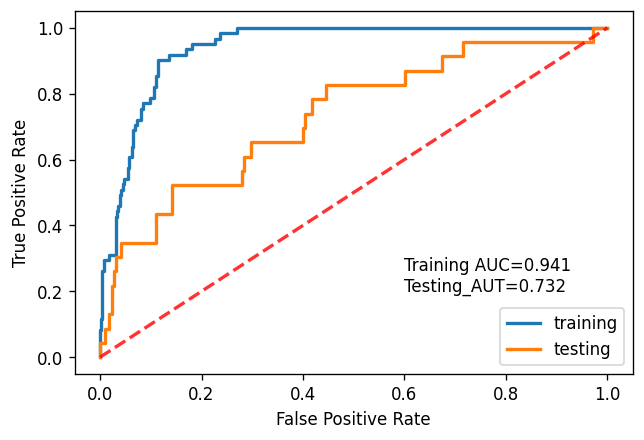

In [531]:
plt.figure(dpi=120)
train_labels, train_pred = getACC(net, trainloader, device=device)
fpr, tpr, thresholds = roc_curve(train_labels, train_pred)
roc_auc_train = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, alpha=1,
             label='training')

test_labels, test_pred = getACC(net, testloader, device=device)
fpr, tpr, thresholds = roc_curve(test_labels, test_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.plot(fpr, tpr, lw=2, alpha=1,
             label='testing')
plt.text(x=0.6, y=0.2, s="Training AUC=%.3f\nTesting_AUT=%.3f"%(roc_auc_train, roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         alpha=.8)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [535]:
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(net.children())

In [536]:
counter = 0 
model_children = model_children[0]
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 2


In [537]:
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([4, 1, 3, 3])
CONV: Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([8, 4, 3, 3])


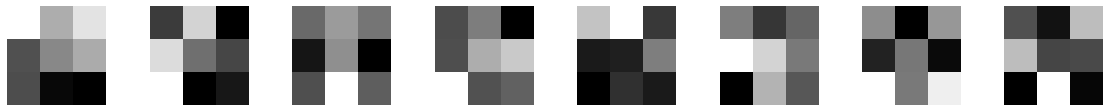

In [538]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[1]):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach().cpu(), cmap='gray')
    plt.axis('off')
    #plt.savefig('../outputs/filter.png')
plt.show()

In [539]:
SE, PO, NE, NO = 0, 0, 0, 0
for _pre, _lab in zip(train_pred, train_labels):
    if _lab == 1:
        PO += 1
        if _pre>0.5:
            SE += 1
    if _lab == 0:
        NO += 1
        if _pre < 0.5:
            NE += 1
print(SE/PO, NE/NO)

0.9016393442622951 0.878


In [540]:
SE, PO, NE, NO = 0, 0, 0, 0
for _pre, _lab in zip(test_pred, test_labels):
    if _lab == 1:
        #print(_pre, _lab)
        PO += 1
        if _pre>0.5 and _lab == 1:
            SE += 1
    if _lab == 0:
        NO += 1
        if _pre < 0.5:
            NE += 1
print(SE/PO, NE/NO)

0.43478260869565216 0.8577981651376146


In [541]:
# Scoreing All genes
spatial_data.loc[spatial_data.index.intersection(autism_mouse_gene),:]  
WholeGenomeDat = []
for human_g, mouse_g in human2mouse.items():
    if mouse_g in spatial_data.index:
        dat = spatial_data.loc[mouse_g,:]
        dat = spatial_transform(spatial_data.columns.values, dat.values)
        WholeGenomeDat.append((dat, human_g))

In [542]:
for dat in WholeGenomeDat:
    if torch.max(dat[0][0]) == 0:
        continue
    else:
        dat[0][0] = dat[0][0]/torch.max(dat[0][0])

In [543]:
batch_size = 64
wholeloader = torch.utils.data.DataLoader(WholeGenomeDat, batch_size=batch_size,
                                          shuffle=False, num_workers=1)

In [544]:
wgs_genes, wgs_score = getACC_WGS(net, wholeloader, device)

D:\Coursework\ML_Genomics\FinalProj\ML_project\Code\JW.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  correct_results_sum1 = ((all_pred >= 0.5) ==  (all_labels ==1)).sum() / len(all_labels)
D:\Coursework\ML_Genomics\FinalProj\ML_project\Code\JW.py:228: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  correct_results_sum2 = ((all_pred < 0.5) ==  (all_labels ==0)).sum() / len(all_labels)


In [545]:
print(len(wgs_genes))

12786


In [546]:
wgs_score

array([0.85831457, 0.0148738 , 0.555161  , ..., 0.08382957, 0.90027767,
       0.42203104])

(array([3376., 2239., 1845., 1494., 1150.,  939.,  773.,  485.,  360.,
         125.]),
 array([3.52064235e-05, 9.86760139e-02, 1.97316821e-01, 2.95957629e-01,
        3.94598436e-01, 4.93239244e-01, 5.91880051e-01, 6.90520859e-01,
        7.89161666e-01, 8.87802474e-01, 9.86443281e-01]),
 <BarContainer object of 10 artists>)

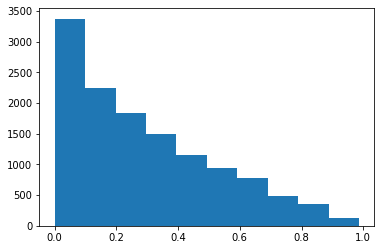

In [547]:
plt.hist(wgs_score)

In [548]:
gene2score = dict(zip(wgs_genes, wgs_score))

In [549]:
ASC_TADA = pd.read_excel("../dat/1-s2.0-S0092867419313984-mmc2.xlsx", sheet_name="Autosomal", index_col="gene")

In [550]:
score_cut = 0.7
selected_genes = []
for gene, score in gene2score.items():
    if score >= score_cut:
        selected_genes.append(gene)
print(len(selected_genes))

915


In [551]:
ASC_TADA_select = ASC_TADA.loc[ASC_TADA.index.intersection(selected_genes), :]
#ASC_TADA_select = ASC_TADA.sample(270)
print(ASC_TADA_select.shape)

(837, 54)


In [552]:
train_genes = list(autism_gene["gene.symbol"].values)
to_drop = ASC_TADA_select.index.intersection(train_genes)
ASC_TADA_select = ASC_TADA_select.drop(index = to_drop)
print(ASC_TADA_select.shape)

(797, 54)


In [553]:
ASC_NTrio = 6430
asc = ASC_TADA

train_genes = list(autism_gene["gene.symbol"].values)
to_drop = asc.index.intersection(train_genes)
asc = asc.drop(index = to_drop)
print(asc.shape)

N_LGD = sum(asc["dn.ptv"])
N_LGD_exp = sum(asc["mut.ptv"]) * 2 * ASC_NTrio
print(N_LGD, N_LGD_exp, N_LGD/N_LGD_exp, (N_LGD - N_LGD_exp)/N_LGD)

(17400, 54)
798 599.3833723430731 1.3313682641553883 0.24889301711394346


In [554]:
N_LGD = sum(ASC_TADA_select["dn.ptv"])
N_LGD_exp = sum(ASC_TADA_select["mut.ptv"]) * 2 * ASC_NTrio
print(N_LGD, N_LGD_exp, (N_LGD - N_LGD_exp)/N_LGD)

71 33.69649950808307 0.5254014153791117


In [555]:
N_Mis = sum(asc["dn.misa"]) + sum(asc["dn.misb"])
N_Mis_exp = (sum(asc["mut.misa"]) + sum(asc["mut.misb"])) * 2 * ASC_NTrio
print(N_Mis, N_Mis_exp, N_Mis/N_Mis_exp, (N_Mis - N_Mis_exp)/N_Mis)

1163 1047.3793761738398 1.1103903957403969 0.09941584163900277


In [556]:
N_Mis = sum(ASC_TADA_select["dn.misa"]) + sum(ASC_TADA_select["dn.misb"])
N_Mis_exp = (sum(ASC_TADA_select["mut.misa"]) + sum(ASC_TADA_select["mut.misb"])) * 2 * ASC_NTrio
print(N_Mis, N_Mis_exp, (N_Mis - N_Mis_exp)/N_Mis)

89 75.0523524966838 0.15671514048669893


In [557]:
#Diciles
gene_sort_by_score = [g for g, s in sorted(gene2score.items(), key=lambda x:x[1])]

In [558]:
print(len(gene_sort_by_score))

12786


In [559]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [560]:
dat_LGD, dat_Mis = [],[]
index = []
for i, gene_group in enumerate(chunks(gene_sort_by_score, 1000)):
    #print(gene_group)
    ASC_TADA_select = ASC_TADA.loc[ASC_TADA.index.intersection(gene_group), :]
    to_drop = ASC_TADA_select.index.intersection(train_genes)
    ASC_TADA_select = ASC_TADA_select.drop(index = to_drop)
    N_LGD = sum(ASC_TADA_select["dn.ptv"])
    N_LGD_exp = sum(ASC_TADA_select["mut.ptv"]) * 2 * ASC_NTrio
    N_Mis = sum(ASC_TADA_select["dn.misa"]) + sum(ASC_TADA_select["dn.misb"])
    N_Mis_exp = (sum(ASC_TADA_select["mut.misa"]) + sum(ASC_TADA_select["mut.misb"])) * 2 * ASC_NTrio
    LGD_r = N_LGD/N_LGD_exp
    Mis_r = N_Mis/N_Mis_exp
    dat_LGD.append(LGD_r)
    dat_Mis.append(Mis_r)
    index.append(i)

In [561]:
print(len(index), len(dat_LGD))

13 13


Text(0, 0.5, 'Enrichment of LGD')

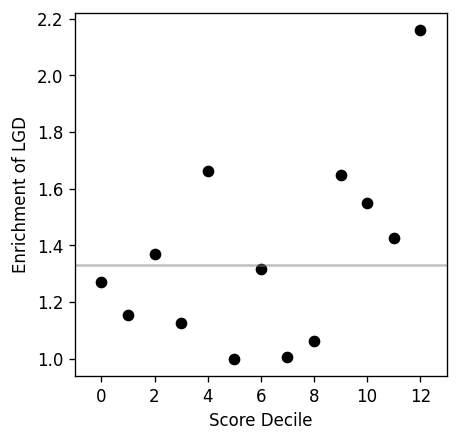

In [569]:
plt.figure(dpi=120, figsize=(4,4))
plt.scatter(index, dat_LGD, color="black")
plt.hlines(y=1.33, xmin=-1, xmax=13, color="grey", alpha=0.5)
plt.xlim((-1, 13))
plt.xlabel("Score Decile")
plt.ylabel("Enrichment of LGD")

Text(0, 0.5, 'Enrichment of DMis')

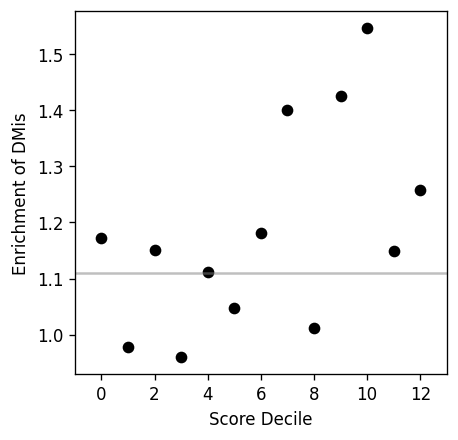

In [570]:
plt.figure(dpi=120, figsize=(4,4))
plt.scatter(index, dat_Mis, color="black")
plt.hlines(y=1.11, xmin=-1, xmax=13, color="grey", alpha=0.5)
plt.xlim((-1, 13))
plt.xlabel("Score Decile")
plt.ylabel("Enrichment of DMis")